# Students Performance in Exams

To Analyse the performance of students based on the given variables

In [1]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load student perfromance in exam data
data=pd.read_csv("../input/students-performance-in-exams/StudentsPerformance.csv")

In [3]:
#Identify the Shape of data
data.shape

(1000, 8)

In [4]:
#To know the content of data
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#To check if there are any Na values in data?
data.isna().sum().sum()


0

In [6]:
#To get the count of male and female students in data?
data.groupby('gender').gender.count()

gender
female    518
male      482
Name: gender, dtype: int64

In [7]:
#Get the detail summanry of math,reading and writing score
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Visualization



As we can see there are 3 continious varibales are given in the data.(That are math score,reading score,writing score). We will use histograms to check the distribution score.

<AxesSubplot:xlabel='math score', ylabel='Density'>

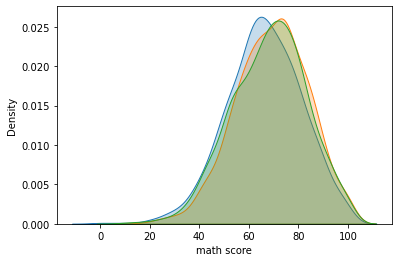

In [8]:
#Histogram
sns.kdeplot(data=data['math score'],label='math score',shade=True)
sns.kdeplot(data=data['reading score'],label='reading score',shade=True)
sns.kdeplot(data=data['writing score'],label='writing score',shade=True)

# Insights
The above chart shows the distribution of math,reading and writing score. As we can see the data chart shows bell curve for the variables that means data is ditributed normally 


# Analyze Students performance

We will add the new variable with name "Average score" to the data in order to analyse the effect of 'test preparation course' and 'lunch' on students scores



In [9]:
data['Average score']=data[['math score','writing score','reading score']].mean(axis=1).round()

In [10]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


1. Measure the impact of test preparaiton course completion on students score

In [11]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Average score'],
      dtype='object')

In [12]:
feature=['math score', 'reading score',
       'writing score', 'Average score']

In [13]:
list(enumerate(feature))

[(0, 'math score'),
 (1, 'reading score'),
 (2, 'writing score'),
 (3, 'Average score')]

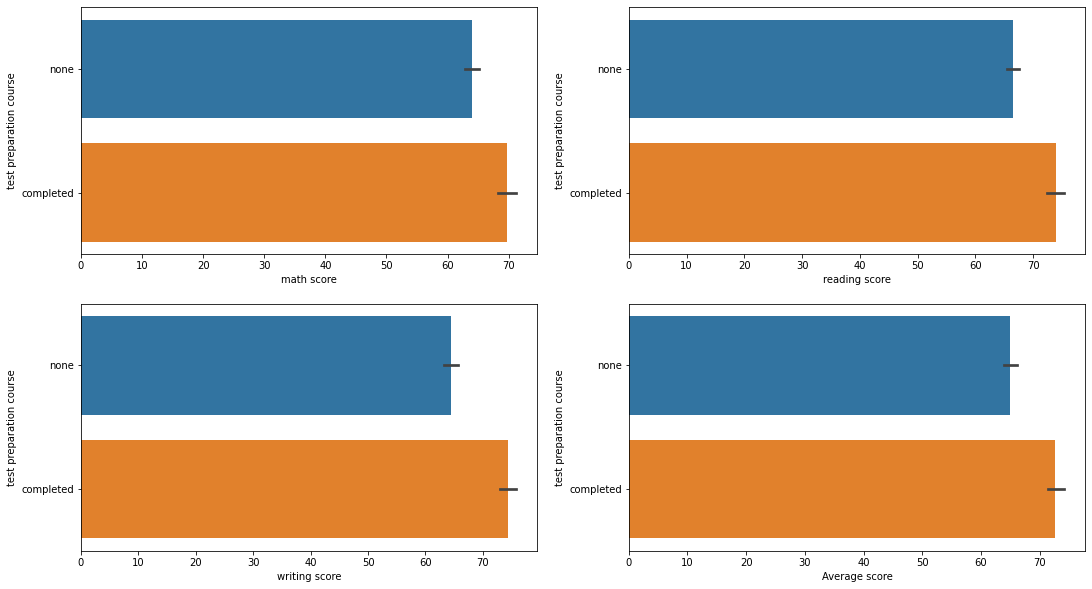

In [14]:
plt.figure(figsize=(18,10))
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sns.barplot(i[1],y="test preparation course",data=data)

#Students who have completed the test preparation course have scored more than those who have not completed the course.
#This indicates that test score completion affectes positively on the students score

2.Measure the impact of lunch on the students score

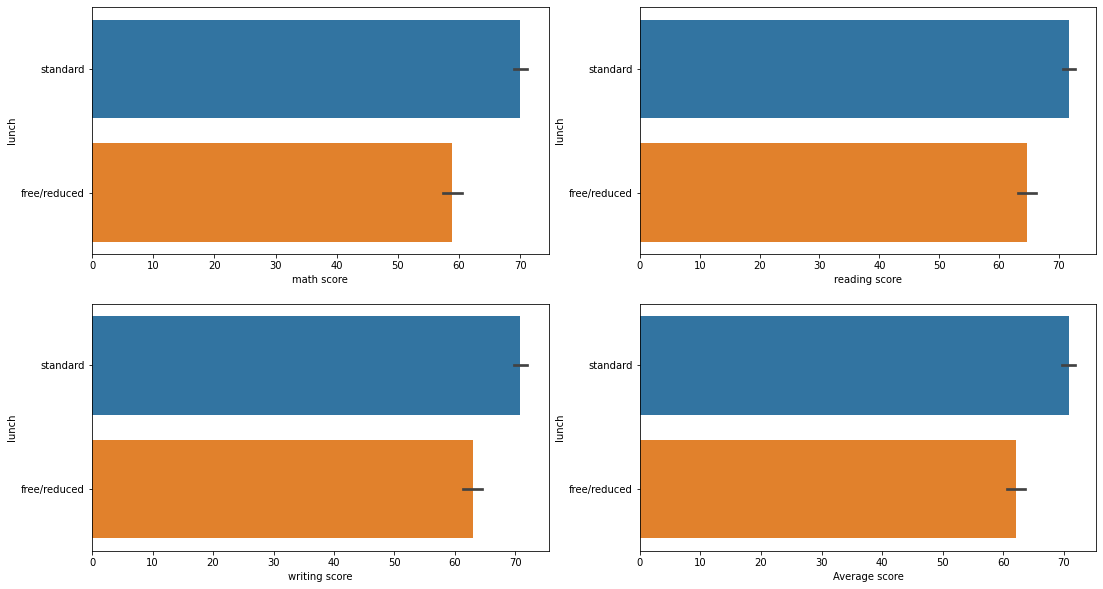

In [15]:
plt.figure(figsize=(18,10))
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sns.barplot(i[1],y="lunch",data=data)

students who are following the standard luch process have scored more marks campare to the marks of students who are following free/reduced lunch process

This shows that standard luch process affects positively on students score

# Some other Visulaization graph

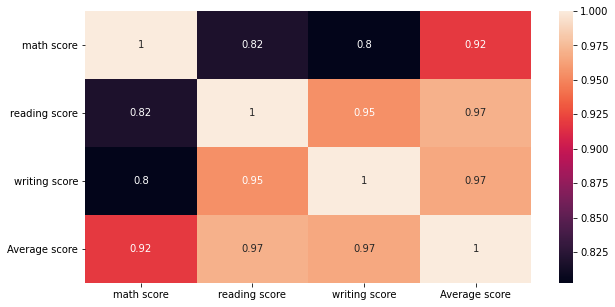

In [16]:
#Check the correlation between variables using heatmap
plt.figure(figsize=(10,5))
ax=sns.heatmap(data.corr(),annot=True)